# HRTEM simulation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from ase.build import mx2
from ase.io import read

from tensorwaves.waves import PlaneWaves
from tensorwaves.potentials import Potential
from tensorwaves.transfer import CTF
import matplotlib.pyplot as plt

## Quick simulation

In [2]:
atoms = read('../data/MoS2.traj')
cell = np.diag(atoms.get_cell())
print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


In [4]:
waves = PlaneWaves(sampling=.05, energy=80e3)
waves = waves.multislice(atoms)
waves = waves.apply_ctf(defocus=200, aperture_cutoff=.03)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 11/11 


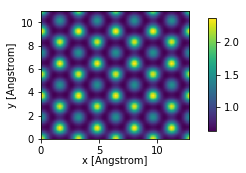

In [5]:
image = waves.image()
image.show()

## Step-by-step simulation

### Set up unit cell

In [6]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=1, axis=2)

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


### Create Potential

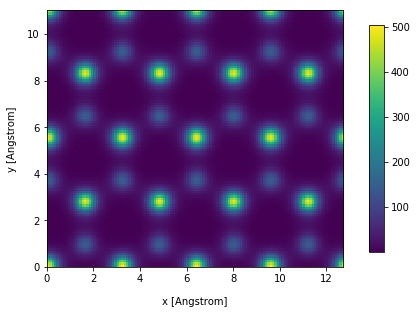

In [7]:
potential = Potential(atoms=atoms, parametrization='kirkland', num_slices=10, sampling=.1)

potential.current_slice = 3

potential.show(fig_scale=2)

### Propagate Wave Function

In [8]:
waves = PlaneWaves(sampling=.05, energy=80e3)
waves = waves.multislice(atoms)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 11/11 


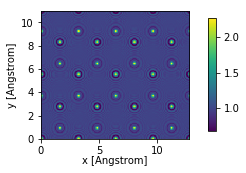

In [9]:
waves.show()

### Apply Contrast Transfer Function

In [11]:
ctf = CTF(defocus=200, aperture_cutoff=.05)

waves = waves.apply_frequency_transfer(ctf)

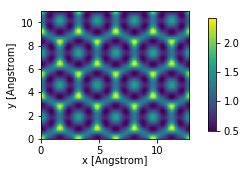

In [12]:
image = waves.image()
image.show()

In [13]:
image.numpy()

array([[[1.5416218, 1.5337305, 1.509927 , ..., 1.4825755, 1.5137362,
         1.5343373],
        [1.5340438, 1.5269203, 1.5040494, ..., 1.473882 , 1.5052172,
         1.5261874],
        [1.5118903, 1.5070014, 1.4868443, ..., 1.4484671, 1.480319 ,
         1.5023639],
        ...,
        [1.4768546, 1.4754766, 1.4595847, ..., 1.408282 , 1.4409616,
         1.464706 ],
        [1.5119295, 1.507042 , 1.4868861, ..., 1.4485053, 1.4803573,
         1.502403 ],
        [1.5340712, 1.5269475, 1.5040762, ..., 1.4739074, 1.5052432,
         1.5262136]]], dtype=float32)